#### 데이터 분석, 시각화
1. 주제 선정 : 마약 연계 범죄 현황 / 심각성

2. 데이터 선정 : kosis.kr 범죄자 마약류 등 상용여부 (경찰청,경찰청범죄통계, 2011~2021, 전국단위)

3. 분석 목표
  * 2011~2021년 내 마약류 관리에 관한 법률 위반 범죄 건수의 증감 추이

4. 데이터 읽어오기, 전처리, 통합 => 단일 df

5. 데이터 탐색 (EDA)

6. 분석 목표별 분석 및 시각화

7. 결론.

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [128]:
filename = "범죄자_마약류_등_상용여부_20230417212131.csv"

pd_data = pd.read_csv(filename, encoding='cp949', header=[3,4])

pd_data.head()

시점  마약류                                                            \
     시점   소계  마약   대마 향정신성의약품 소계.1 마약.1 대마.1 향정신성의약품.1  소계.2 마약.2 대마.2   
0  2014  491  27  452      12   89   70    7        12  2809  363   30   
1  2015  193  31  158       4   13    8    -         5   953  241    6   
2  2016   91   7   80       4   19   14    -         5   706  114    6   
3  2017  140   9  122       9   30   24    -         6   832  135   14   
4  2018  566  17  520      29  133  100    4        29  3291  190   29   

             
  향정신성의약품.2  
0      2416  
1       706  
2       586  
3       683  
4      3072

In [129]:
pd_data.columns

MultiIndex([( '시점',        '시점'),
            ('마약류',        '소계'),
            ('마약류',        '마약'),
            ('마약류',        '대마'),
            ('마약류',   '향정신성의약품'),
            ('마약류',      '소계.1'),
            ('마약류',      '마약.1'),
            ('마약류',      '대마.1'),
            ('마약류', '향정신성의약품.1'),
            ('마약류',      '소계.2'),
            ('마약류',      '마약.2'),
            ('마약류',      '대마.2'),
            ('마약류', '향정신성의약품.2')],
           )

In [130]:
pd_data[('마약류','total')] = pd_data[('마약류', '소계')] + pd_data[('마약류', '소계.1')] + pd_data[('마약류', '소계.2')]

In [131]:
df1 = pd.concat((pd_data[('시점','시점')],pd_data[('마약류','total')]), axis=1)

df1.columns = ('시점', '마약범죄건수')

df1

,시점,마약범죄건수
0,2014,3389
1,2015,1159
2,2016,816
3,2017,1002
4,2018,3990
5,2019,5240
6,2020,5519
7,2021,5107


596.2619047619049 -1199680.6428571432


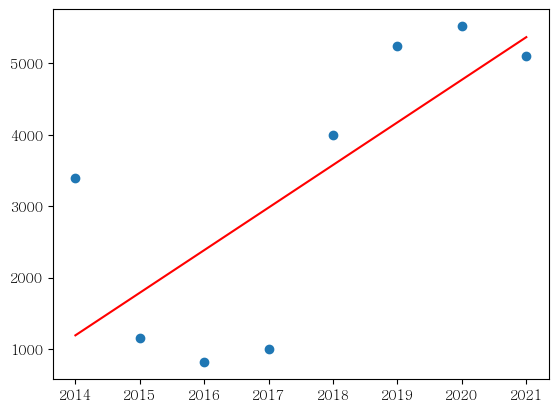

In [132]:
xs = df1['시점']
ys = df1['마약범죄건수']


corr = np.corrcoef(xs, ys)[0,1]

std_x = np.std(xs)
std_y = np.std(ys)

mean_x = np.mean(xs)
mean_y = np.mean(ys)


a = corr * (std_y/std_x)
b = mean_y - (a*mean_x)
print(a,b)

_, axe = plt.subplots()
axe.scatter(xs,ys)

axe.plot(xs, a*xs+b, color='red')

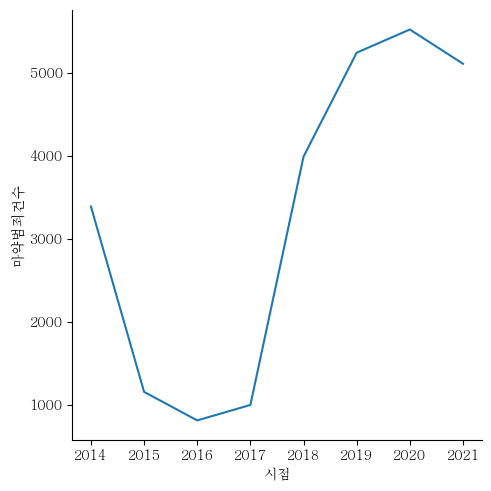

In [133]:
sns.relplot(data=df1, x='시점', y='마약범죄건수', kind='line')

In [135]:
filename = "범죄자_마약류_등_상용여부_20230417215058.csv"

pd_data = pd.read_csv(filename, encoding='cp949', header=[3])

# pd_data.set_index(('시점','시점'), inplace=True)
# pd_data.index.name = '시점'

# pd_data = pd_data.stack(level=0)

# pd_data.reset_index()

pd_data

,시점,마약류,마약류.1,마약류.2,마약류.3,마약류.4,마약류.5,마약류.6,마약류.7,마약류.8
0,시점,마약,대마,향정신성의약품,마약,대마,향정신성의약품,마약,대마,향정신성의약품
1,2014,27,452,12,70,7,12,363,30,2416
2,2015,31,158,4,8,-,5,241,6,706
3,2016,7,80,4,14,-,5,114,6,586
4,2017,9,122,9,24,-,6,135,14,683
5,2018,17,520,29,100,4,29,190,29,3072
6,2019,16,896,32,129,6,35,237,77,3812
7,2020,16,1088,44,186,7,56,255,60,3807
8,2021,13,1003,54,190,4,35,244,79,3485
